In [48]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [49]:
# Bring the Dataset
from keras.datasets import boston_housing
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

In [50]:
train_data.shape

(404, 13)

In [51]:
test_data.shape

(102, 13)

mean(axis=?)

    여기에서 axis값은 0 혹은 1이 될 수 있는데
    
    0의 값은 column 의 평균값(가로, 좌->우 로 움직일때 각 컬럼의 값)을 의미하고
    
    1의 값은 row의 평균 값으로 (세로 위->아래 로 움직일때 각 줄의 값)

    예) 만약 중간고사 시험점수를 과목별 수학/과학/영어/국어 로 평균을 낸다면 axis=0
    
    만약 각각 사람의 시험결과 평균을 낸다면 axis=1


In [52]:
# Getting ready to use data
# 전체 데이터의 평균값

# Trying to get standard scaling
mean = train_data.mean(axis=0)

In [53]:
train_data -= mean

In [54]:
# 표준편차를 구함
std = train_data.std(axis=0)

In [63]:
train_data /= std
# train_data = train_data / std

In [64]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [65]:
# Build Neural Network
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # 마지막 함수로 집값이 그대로 나감
    
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae']) # mean-absolute-error
    
    return model

K-Folder Validation
    
    만약 K=3이라면
    
    데이터를 3개의 폴더로 나눈 뒤
    
    첫번째 폴더에서 데이터를 3개로 분할 후 첫번째는 검증, 2개는 훈련
    
    두번째 폴더에서도 데이터를 3분할 후, 2번째는 검증, 1번째 3번째는 훈련
    
    마지막 세번째에서는, 3번째를 검증, 1, 2번쨰로 훈련

In [68]:
k = 4
num_epochs = 500

num_val_samples = len(train_data)//k # 폴더의 사이즈
all_scores = []

for i in range(k):
    print('Working on fold #',i)
    
    # 검증 데이터를 준비: k번째 분할
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_labels = train_labels[i*num_val_samples:(i+1)*num_val_samples]
    
    # 훈련 데이터를 준비:
    particial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]], axis=0)
    
    # 훈련 라벨 준비:
    particial_train_labels = np.concatenate([train_labels[:i*num_val_samples],train_labels[(i+1)*num_val_samples:]], axis=0)
    
    # print(i*num_val_samples,(i+1)*num_val_samples)
    
    model = build_model()
    history = model.fit(particial_train_data, 
                        particial_train_labels, 
                        epochs=num_epochs, 
                        batch_size=1, 
                        validation_data=(val_data, val_labels),
                        verbose=0)
    mae_history = history.history['mae']

    all_scores.append(mae_history)

Working on fold # 0
Working on fold # 1
Working on fold # 2
Working on fold # 3


In [70]:
# 각 epoch 별로 평균을 구해냄
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)] 

Text(0, 0.5, 'Validation MAE')

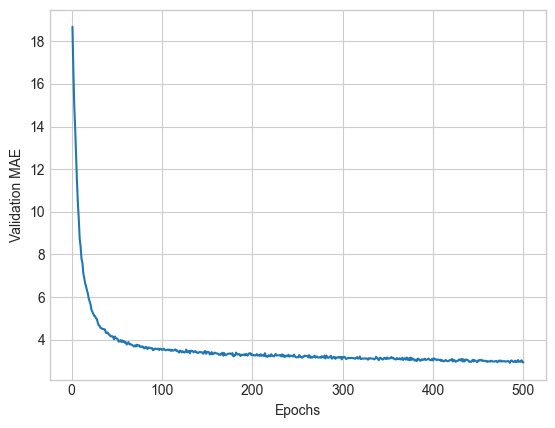

In [72]:
# Data Visualization

plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

평균 80번 정도부터 MAE가 천천히 내려감